In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
###########################################################################
# How to use filter2D
###########################################################################
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

#averaging filter 
ksize = 10
kernel = np.ones((ksize,ksize),np.float32)/(ksize*ksize)
print(kernel)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [3]:
img_box = cv2.filter2D(img,-1,kernel)

(<Axes: title={'center': 'box u filter2D'}>,
 Text(0.5, 1.0, 'box u filter2D'),
 (-0.5, 511.5, 511.5, -0.5))

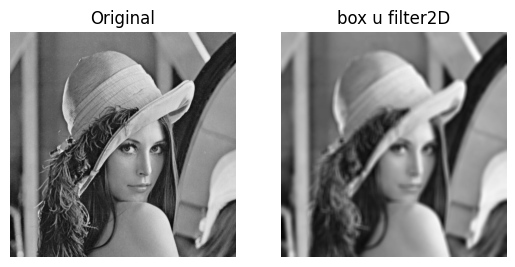

In [5]:
plt.subplot(1,2,1),plt.imshow(img, cmap='gray'),plt.title('Original'), plt.axis('off')
plt.subplot(1,2,2),plt.imshow(img_box, cmap='gray'),plt.title('box u filter2D'), plt.axis('off')

In [6]:
#gaussian filter 
ksize = 31
sigma = 10  
#kernel = np.ones((ksize,ksize),np.float32)/(ksize*ksize)
img_g1 = cv2.GaussianBlur(img,(ksize,ksize),sigma)

kernel_1d=cv2.getGaussianKernel(ksize = ksize, sigma = sigma)
kernel = np.outer(kernel_1d, kernel_1d.transpose())
print(kernel)
img_g2 = cv2.filter2D(img,-1,kernel)



[[0.0002171  0.00025098 0.00028726 0.0003255  0.00036517 0.0004056
  0.00044602 0.00048559 0.00052341 0.00055857 0.00059015 0.00061731
  0.0006393  0.00065548 0.00066539 0.00066873 0.00066539 0.00065548
  0.0006393  0.00061731 0.00059015 0.00055857 0.00052341 0.00048559
  0.00044602 0.0004056  0.00036517 0.0003255  0.00028726 0.00025098
  0.0002171 ]
 [0.00025098 0.00029014 0.00033208 0.00037629 0.00042216 0.00046889
  0.00051562 0.00056137 0.00060509 0.00064572 0.00068223 0.00071364
  0.00073906 0.00075776 0.00076922 0.00077307 0.00076922 0.00075776
  0.00073906 0.00071364 0.00068223 0.00064572 0.00060509 0.00056137
  0.00051562 0.00046889 0.00042216 0.00037629 0.00033208 0.00029014
  0.00025098]
 [0.00028726 0.00033208 0.00038008 0.00043068 0.00048317 0.00053666
  0.00059015 0.0006425  0.00069255 0.00073906 0.00078084 0.00081678
  0.00084588 0.00086729 0.0008804  0.00088481 0.0008804  0.00086729
  0.00084588 0.00081678 0.00078084 0.00073906 0.00069255 0.0006425
  0.00059015 0.0005366

ValueError: num must be an integer with 1 <= num <= 2, not 3

<Figure size 640x480 with 0 Axes>

(<Axes: title={'center': 'gauss u. filter2D'}>,
 Text(0.5, 1.0, 'gauss u. filter2D'),
 (-0.5, 511.5, 511.5, -0.5))

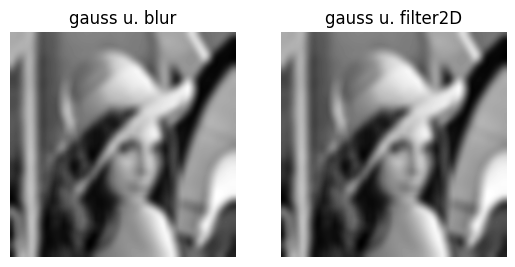

In [7]:

plt.subplot(1,2,1),plt.imshow(img_g1, cmap='gray'),plt.title('gauss u. blur'), plt.axis('off')
plt.subplot(1,2,2),plt.imshow(img_g2, cmap='gray'),plt.title('gauss u. filter2D'), plt.axis('off')
   

In [9]:
img = cv2.imread('Lena.png', cv2.IMREAD_GRAYSCALE)

# add salt noise 
noise_level = 0.05
img_noise = img.copy()

num_noise = noise_level*img.shape[0]*img.shape[1]
coords_x = [np.random.randint(0, img.shape[1] - 1, int(num_noise))] 
coords_y = [np.random.randint(0, img.shape[0] - 1, int(num_noise))] 
img_noise[coords_y, coords_x]  = 255 # white salt

# pepper
num_noise = noise_level*img.shape[0]*img.shape[1]
coords_x = [np.random.randint(0, img.shape[1] - 1, int(num_noise))] 
coords_y = [np.random.randint(0, img.shape[0] - 1, int(num_noise))] 
img_noise[coords_y, coords_x]  = 0   # black pepper

(<Axes: title={'center': 'S&P noise'}>,
 Text(0.5, 1.0, 'S&P noise'),
 (-0.5, 511.5, 511.5, -0.5))

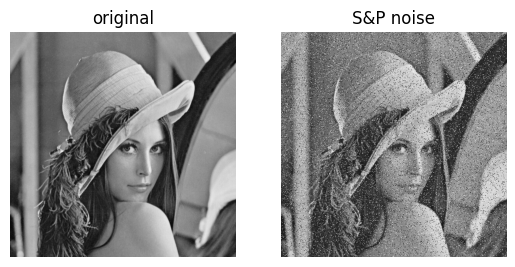

In [10]:
plt.subplot(1,2,1),plt.imshow(img, cmap='gray'),plt.title('original'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(img_noise,  cmap='gray'),plt.title('S&P noise'), plt.axis('off')


(<Axes: title={'center': 'median'}>,
 Text(0.5, 1.0, 'median'),
 (-0.5, 511.5, 511.5, -0.5))

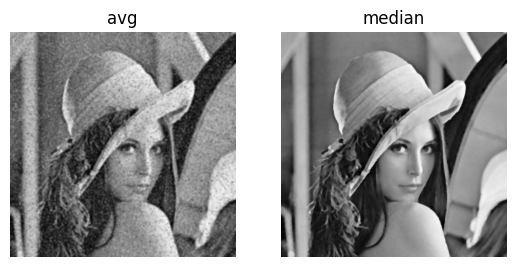

In [12]:
blur_gauss = cv2.GaussianBlur(img_noise,(5,5),2.0)
blur_median = cv2.medianBlur(img_noise,5)
    #blur_bilateral = cv2.bilateralFilter(img,9,75,75)   

plt.subplot(1,2,1),plt.imshow(blur_gauss,  cmap='gray'),plt.title('avg'),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(blur_median,  cmap='gray'),plt.title('median'),plt.axis('off')